<a href="https://colab.research.google.com/github/politeles/ImageClassification/blob/master/ppmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The PPMI dataset contains images of humans interacting with twelve different musical instruments. They are: bassoon, cello, clarinet, erhu, flute, French horn, guitar, harp, recorder, saxophone, trumpet, and violin.

Images of bassoon, erhu, flute, French horn, guitar, saxophone, and violin were collected by Bangpeng Yao and published in [Yao and Fei-Fei, 2010].
    Images of cello, clarinet, harp, recorder, and trumpet were collected by Aditya Khosla and released in Septempber 2010.

     

Download Check the original website: [PPMI](http://ai.stanford.edu/~bangpeng/ppmi.html)
  


Dataset Reference
  Bangpeng Yao and Li Fei-Fei. Grouplet: A Structured Image Representation for Recognizing Human and Object Interactions. IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2010. 


In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
import sys, os

In [0]:
from fastai.vision import *

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
 # download data file to gdrive:
 cd base_dir
 wget http://vision.stanford.edu/Datasets/norm_ppmi_7class.zip

In [0]:
folders=['bassoon','erhu','flute','frenchhorn','guitar','saxophone','violin']
train_test = ['train','test']
tests = ['play_instrument','with_instrument']

In [0]:
import zipfile
path = Path(base_dir + 'data/norm_ppmi_7class.zip')
path_extract = Path(base_dir + 'data/norm_ppmi_7class/')

In [0]:
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall(path_extract)

In [0]:
for t in train_test:
  path_t = Path(base_dir + 'data/norm_ppmi_7class/' + t + '/')
  path_t.mkdir(parents=True, exist_ok=True)
  for test in tests:
    for c in folders:
      path_inst = Path(base_dir + 'data/norm_ppmi_7class/' + test + '/' + t + '/' +  c + '/')
      path_inst.mkdir(parents=True, exist_ok=True)

In [0]:
for t in train_test:
  for test in tests:
    for c in folders:
      path_inst = Path(base_dir + 'data/norm_ppmi_7class/norm_image/' + test + '/' + c + '/' +  t + '/')
      new_path = Path(base_dir + 'data/norm_ppmi_7class/' + test + '/' + t + '/' +  c + '/')
      path_inst.rename(new_path)
 #     for path, subdirs, files in os.walk(path_inst):
 #       for name in files:
 #         p = Path(name).absolute()
 #         new_path = Path(base_dir + 'data/norm_ppmi_7class/norm_image/' + test + '/' + t + '/' +  c + '/')
 #         print(f'Old path: {path_inst} -Z new path {new_path}')

          #p.rename(new_path / p.name)


In [0]:
for t in train_test:
  for test in tests:
    for c in folders:
      new_path = Path(base_dir + 'data/norm_ppmi_7class/' + test + '/' + t + '/' +  c + '/')
      verify_images(new_path, delete=False, max_size=500)

In [0]:
np.random.seed(42)
path_play_instrument = Path(base_dir + 'data/norm_ppmi_7class/play_instrument/' )
data = ImageDataBunch.from_folder(path_play_instrument, valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [8]:
data.classes

['bassoon', 'erhu', 'flute', 'frenchhorn', 'guitar', 'saxophone', 'violin']

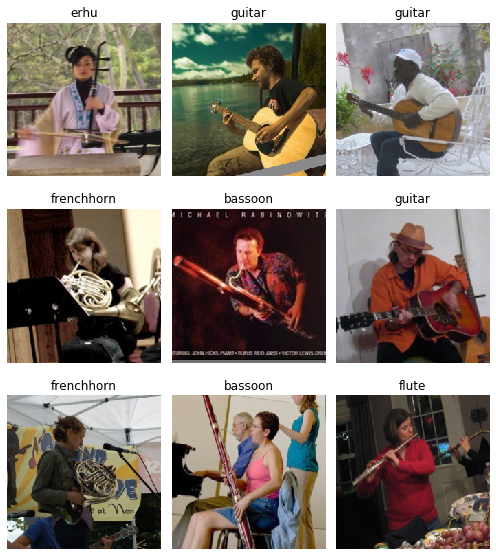

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 82.2MB/s]


In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.067108,0.501431,0.157143,07:07
1,1.198874,0.400914,0.107143,06:48
2,0.840552,0.342806,0.092857,06:52
3,0.648163,0.354804,0.096429,06:52


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


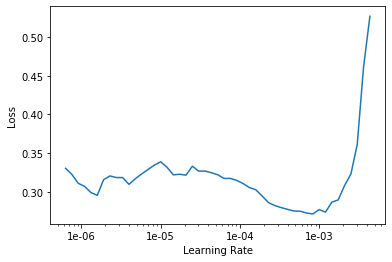

In [15]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.283897,0.283795,0.089286,10:06
1,0.198885,0.233668,0.071429,10:07


In [0]:
learn.save('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

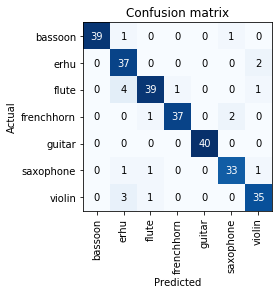

In [19]:
interp.plot_confusion_matrix()